# Create Noise Spectrogram and remove from Target

## Setup

In [41]:
import requests
import ibmseti
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# Create team folder (please replace my_team_name_data_folder with your team name)
mydatafolder = os.environ['PWD'] + '/' + 'my_team_name_data_folder'
if os.path.exists(mydatafolder) is False:
    os.makedirs(mydatafolder)

In [43]:
# Download data (if you have not already downloaded the primary small dataset)
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
filename = 'primary_small.zip'
primary_small_url = '{}/simsignals_v2_zipped/{}'.format(base_url, filename)
os.system('curl {} > {}'.format(primary_small_url, mydatafolder +'/'+filename))
filename = 'public_list_primary_v2_small_1june_2017.csv'
primary_small_csv_url = '{}/simsignals_files/{}'.format(base_url, filename)
os.system('curl {} > {}'.format(primary_small_csv_url, mydatafolder +'/'+filename))

0

## Calculate the Average Noise

#### Note: this will compute the average spectrogram using all of the "noise" spectrograms in the primary_small data. This wil take a bit of time

In [46]:
zz = zipfile.ZipFile(mydatafolder + '/' + 'primary_small.zip')
csv_data = zz.namelist()[1:]
        
data = []
N = 1
for i,v in enumerate(csv_data):
    d = zz.open(v).read()
    aca = ibmseti.compamp.SimCompamp(d)
    if aca.header()['signal_classification'] == 'noise':
        spec = aca.get_spectrogram()
        if len(data) == 0:
            data = spec
        else:
            data = data + spec
            N += 1
data = data/N
print "done"

done


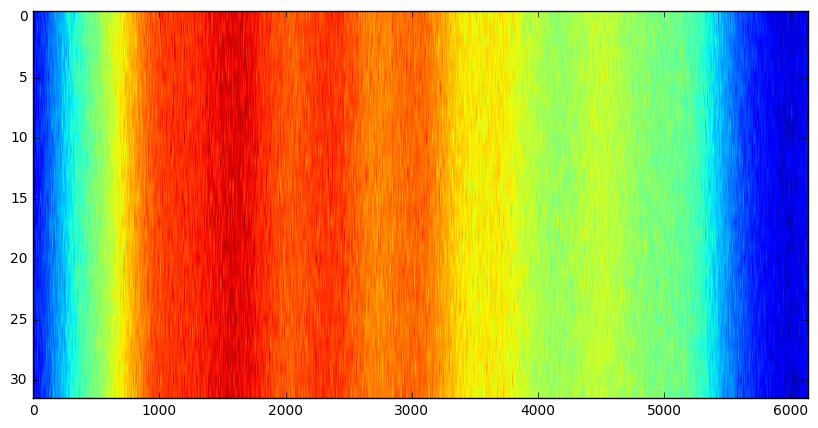

In [28]:
# This is what the average noise plot looks like
fig, ax = plt.subplots(figsize=(10, 5))   
ax.imshow(np.log(data), aspect = 0.5*float(data.shape[1]) / data.shape[0])

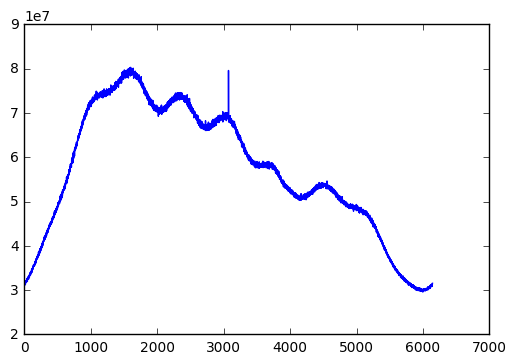

In [47]:
# This is the power spectrum of the image above.
plt.plot(np.sum(data, axis=0))

### Extract the noise from an image

{u'signal_classification': u'narrowbanddrd', u'uuid': u'65c59ea8-ac50-406e-a965-b994f7b85193'}


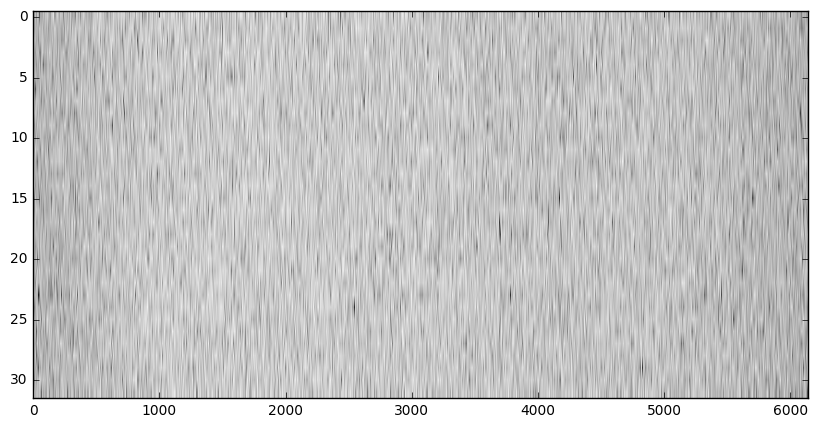

In [51]:
# Grab some random data file
zz = zipfile.ZipFile(mydatafolder + '/' + 'primary_small.zip')
csv_data = zz.namelist()[1:]
        
d = zz.open(csv_data[4]).read()
aca = ibmseti.compamp.SimCompamp(d)
print aca.header()
spec = aca.get_spectrogram()
fig, ax = plt.subplots(figsize=(10, 5))   
ax.imshow(np.log(spec), aspect = 0.5*float(spec.shape[1]) / spec.shape[0], cmap="gray")

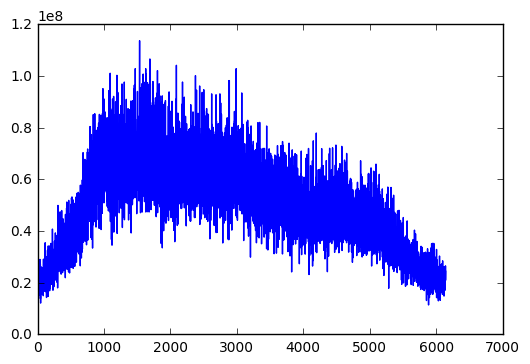

In [52]:
plt.plot(np.sum(spec, axis=0))

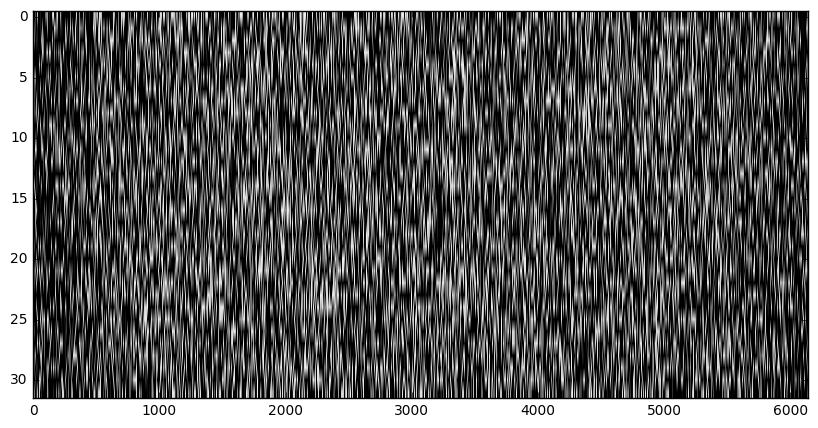

In [53]:
# Remove the noise, then plot the same two charts over again
spec = spec - data
spec[spec < 0] = 0.00001
fig, ax = plt.subplots(figsize=(10, 5))   
ax.imshow(np.log(spec), aspect = 0.5*float(spec.shape[1]) / spec.shape[0], cmap="gray")

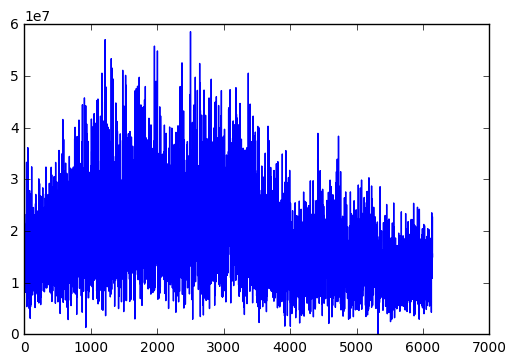

In [33]:
plt.plot(np.sum(spec, axis=0))

In [ ]:
# Make sure that if you save this data, you save it to your team folder